In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
print(df['MLOGP'].max(), df['MLOGP'].min())
print(df['RDCHI'].max(), df['RDCHI'].min())
print(df['quantitative response of LC50'].max(), df['quantitative response of LC50'].min())

9.148 -6.446
6.439 1.0
10.047 0.122


In [4]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [5]:
# Value order to be followed: x1,x2,y,x1^2,x1x2,x2^2,x1y,x2y,y^2
valX = df[df.columns[:]].to_numpy()
valX1 = (valX[:,0]**2)/2 ##-----------------------------------------------------------------------------------------------x1^2/2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,1]**2)/2 ##-----------------------------------------------------------------------------------------------x2^2/2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,1]**2)/2 ##-----------------------------------------------------------------------------------------------y^2/2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #---------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,2] #---------------------------------------------------------------------------------------------x1y
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]*valX[:,2] #---------------------------------------------------------------------------------------------x2y
valX = np.append(valX, np.column_stack([valX1]), axis = 1)




print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,:])


(546, 9)
[2.419     1.225     3.74      2.9257805 0.7503125 0.7503125 2.963275
 9.04706   4.5815   ]


In [6]:
Z1 = np.sum(valX[:,3:], axis = 0)
np.shape(Z1)
print(Z1)

[2287.8900465 1874.9844015 1874.9844015 3399.938402  6730.876289
 6626.66122  ]


In [7]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

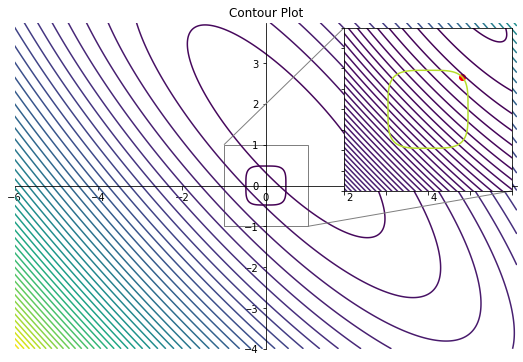

In [8]:

# fig, ax = plt.subplots(1, 1)

# feature_x = valX[:,0]
# feature_y = valX[:,1]
fig = plt.figure(figsize=(9,6))
ax = fig.subplots(1,1)
# ax = fig.add_subplot(1, 1 ,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

feature_x = np.arange(-6, 6, 0.01)
feature_y = np.arange(-4, 4, 0.01)

  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x,feature_y)

F = 0.052 - Y**4 - X**4

Z = (X**2)*Z1[0] + (Y**2)*Z1[1] + Z1[2] + X*Y*Z1[3] - X*Z1[4] - Y*Z1[5]
C1 = ax.contour(X, Y, Z, 50)#

C2 = plt.contour(X, Y, (F), [0])

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.contour(X, Y, Z, 400)
axins.contour(X, Y, F)
plt.scatter(0.4,0.4, c= 'red')
axins.set_xlim(-1, 1)
axins.set_ylim(-1, 1)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
ax.set_title('Contour Plot')
plt.show()


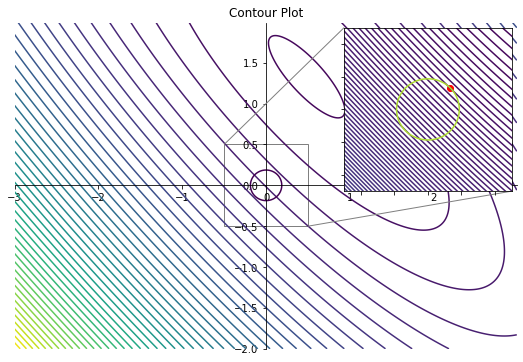

In [9]:

# fig, ax = plt.subplots(1, 1)

# feature_x = valX[:,0]
# feature_y = valX[:,1]
fig = plt.figure(figsize=(9,6))
ax = fig.subplots(1,1)
# ax = fig.add_subplot(1, 1 ,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

feature_x = np.arange(-3, 3, 0.01)
feature_y = np.arange(-2, 2, 0.01)

  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x,feature_y)

F = 0.035 - Y**2 - X**2

Z = (X**2)*Z1[0] + (Y**2)*Z1[1] + Z1[2] + X*Y*Z1[3] - X*Z1[4] - Y*Z1[5]
C1 = ax.contour(X, Y, Z, 50)#

C2 = plt.contour(X, Y, (F), [0])

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.contour(X, Y, Z, 400)
axins.contour(X, Y, F)
plt.scatter(0.13,0.13, c= 'red')
axins.set_xlim(-0.5, 0.5)
axins.set_ylim(-0.5, 0.5)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
ax.set_title('Contour Plot')
plt.show()


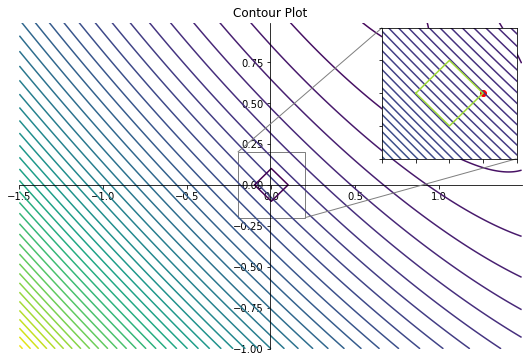

In [10]:

# fig, ax = plt.subplots(1, 1)

# feature_x = valX[:,0]
# feature_y = valX[:,1]
fig = plt.figure(figsize=(9,6))
ax = fig.subplots(1,1)
# ax = fig.add_subplot(1, 1 ,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

feature_x = np.arange(-1.5, 1.5, 0.01)
feature_y = np.arange(-1, 1, 0.01)

  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x,feature_y)

F = 0.1 - np.abs(Y) - np.abs(X)

Z = (X**2)*Z1[0] + (Y**2)*Z1[1] + Z1[2] + X*Y*Z1[3] - X*Z1[4] - Y*Z1[5]
C1 = ax.contour(X, Y, Z, 50)#

C2 = plt.contour(X, Y, (F), [0])

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.contour(X, Y, Z, 200)
axins.contour(X, Y, F)
plt.scatter(0.1,0.0, c= 'red')
axins.set_xlim(-0.2, 0.2)
axins.set_ylim(-0.2, 0.2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
ax.set_title('Contour Plot')
plt.show()


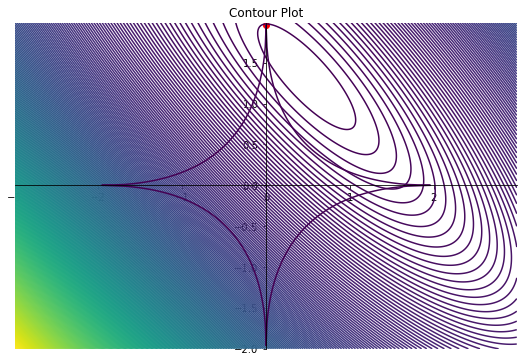

In [11]:

# fig, ax = plt.subplots(1, 1)

# feature_x = valX[:,0]
# feature_y = valX[:,1]
fig = plt.figure(figsize = (9,6))
ax = fig.subplots(1,1)
# ax = fig.add_subplot(1, 1 ,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

feature_x = np.arange(-3, 3, 0.01)
feature_y = np.arange(-2, 2, 0.01)

  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x,feature_y)

F = 1.4 - np.abs(Y)**0.5 - np.abs(X)**0.5

Z = (X**2)*Z1[0] + (Y**2)*Z1[1] + Z1[2] + X*Y*Z1[3] - X*Z1[4] - Y*Z1[5]
C1 = ax.contour(X, Y, Z, 300)#

C2 = plt.contour(X, Y, (F), [0])
plt.scatter(0, 1.96, c= 'red')

# axins = zoomed_inset_axes(ax, 2, loc=1, bbox_to_anchor=(0.2, 0.55))
# axins.contour(X, Y, Z, 200)
# axins.contour(X, Y, F)
# plt.scatter(0.1,0.0, c= 'red')
# axins.set_xlim(-0.1, 0.1)
# axins.set_ylim(1.9, 2.1)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.draw()
ax.set_title('Contour Plot')
plt.show()


In [12]:
err = 0
w1, w2 = 0.4, 0.4
for j in range(np.shape(valX)[0]):
    err += (valX[j,2] - w1*valX[j,0] - w2*valX[j,1])**2
    
err/np.shape(valX)[0]

9.329685312820523

In [13]:
err = 0
w1, w2 = 0.13, 0.13
for j in range(np.shape(valX)[0]):
    err += (valX[j,2] - w1*valX[j,0] - w2*valX[j,1])**2
    
err/np.shape(valX)[0]

18.57619303661173

In [14]:
err = 0
w1, w2 = 0.1, 0.0
for j in range(np.shape(valX)[0]):
    err += (valX[j,2] - w1*valX[j,0] - w2*valX[j,1])**2
    
err/np.shape(valX)[0]

22.08703410097069

In [15]:
err = 0
w1, w2 = 0, 1.96
for j in range(np.shape(valX)[0]):
    err += (valX[j,2] - w1*valX[j,0] - w2*valX[j,1])**2
    
err/np.shape(valX)[0]

3.277117668873258